<a href="https://colab.research.google.com/github/sauravrox/covid-19/blob/master/COVID_19_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas library
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
#creating an empty dataframe for our dataset
df = pd.DataFrame()
!pip install xgboost

In [ ]:
# Read Heart_s.csv dataset from local disk and copy it to df Dataframe
#df=pd.read_csv('./only_labels_simple.csv')
from google.colab import drive
drive.mount("/content/gdrive")
df=pd.read_csv('/content/gdrive/MyDrive/Balanced_dataset.csv')
#df2=pd.read_csv('./only_labels_simple -test.csv',encoding="ISO-8859–1")


Mounted at /content/gdrive


In [ ]:
df.groupby('outcome').size()


outcome
died         6010
recovered    6010
dtype: int64

In [ ]:
df = df.loc[:,~df.columns.duplicated()]
df=df.replace('died',0)
df=df.replace('recovered',1)
df=df.replace('stable',1)
df=df.replace('severe',0)
df['chronic_disease'].fillna(0,inplace = True)
df1=df
df2=df
df1 = df1.loc[:,~df1.columns.duplicated()]
df2 = df2.loc[:,~df2.columns.duplicated()]

In [ ]:
#check df Data set to make sure data is correct
df.head()

,age,sex,city,province,country,lives_in_Wuhan,travel_history_location,additional_information,chronic_disease_binary,chronic_disease,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,chronic_disease_prostate,chronic_disease_cancer,chronic_disease_TB,chronic_disease_Hepatitis,chronic_disease_HIV,chronic_disease_cereberal,chronic_disease_Parkinson,chronic_disease_bronchitis,chronic_disease_hypothyroidism,chronic_disease_dyslipidemia,anorexia,chest pain,chills,conjunctivitis,cough,diarrhea,dizziness,dyspnea,emesis,expectoration,eye irritation,fatigue,fever,gasp,headache,kidney failure,lesions on chest radiographs,hypertension,Myalgia,obnubilation,pneumonia,myelofibrosis,respiratory distress,rhinorrhea,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
0,65.0,0,Seattle,Washington,United States,NaN,NaN,family member of a confirmed case of COVID-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,54.0,0,Taguig,Metro Manila,Philippines,NaN,NaN,C871964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,40.0,0,Pasay,Metro Manila,Philippines,NaN,NaN,C430124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,28.0,0,Muntinlupa,Metro Manila,Philippines,NaN,NaN,C741550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30.0,0,Cainta,Rizal,Philippines,NaN,NaN,C535553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
len(df1.columns)

61

In [ ]:
#creating a list of numerical feature names

num_feat=['age', 'sex', 'chronic_disease_binary','chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']


In [ ]:
df.corr()

,age,sex,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,chronic_disease_prostate,chronic_disease_cancer,chronic_disease_TB,chronic_disease_Hepatitis,chronic_disease_HIV,chronic_disease_cereberal,chronic_disease_Parkinson,chronic_disease_bronchitis,chronic_disease_hypothyroidism,chronic_disease_dyslipidemia,anorexia,chest pain,chills,conjunctivitis,cough,diarrhea,dizziness,dyspnea,emesis,expectoration,eye irritation,fatigue,fever,gasp,headache,kidney failure,lesions on chest radiographs,hypertension,Myalgia,obnubilation,pneumonia,myelofibrosis,respiratory distress,rhinorrhea,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
age,1.000000,0.049554,0.193957,0.167183,0.116855,0.080140,0.071872,0.061443,0.018021,0.046747,0.053759,3.253826e-02,0.026688,0.021084,0.011192,0.039393,0.037745,0.037727,0.031776,1.431624e-02,-0.001823,-0.003412,-0.003159,-0.001289,-0.002414,-0.002233,-0.001289,-0.003159,0.036260,0.024729,-0.001289,-1.653140e-03,-0.003207,-0.003159,-0.003869,-0.003647,-0.001823,-0.001823,-0.003647,-0.001289,-0.009139,-0.001289,-0.009052,-0.007572,-0.002883,-0.001289,-0.004235,-0.002233,-0.005624,-0.002812,-0.002233,-0.001823,-0.001823,1.264008e-01
sex,0.049554,1.000000,0.031708,0.018917,0.024827,0.012495,0.001556,0.014353,0.000452,0.012216,0.018004,1.138515e-02,0.008050,0.011385,-0.014617,-0.002285,-0.014617,0.013944,-0.007287,1.138515e-02,-0.001616,0.000452,0.012216,0.008050,-0.000231,0.003329,0.008050,0.004708,0.008050,-0.001616,0.008050,6.405785e-03,-0.010104,0.019723,-0.006494,0.003269,-0.001616,-0.001616,-0.009735,0.008050,-0.010628,-0.010335,-0.011361,-0.003615,0.001556,0.008050,-0.016303,-0.007287,-0.007095,-0.001571,0.003329,-0.001616,-0.001616,1.141967e-01
chronic_disease_binary,0.193957,0.031708,1.000000,0.800582,0.595078,0.371812,0.195856,0.231760,0.231760,0.214559,0.195856,1.238549e-01,0.087575,0.123855,0.061256,0.175172,0.123855,0.151697,0.151697,1.238549e-01,-0.001344,-0.002514,-0.002328,-0.000950,0.003187,-0.001646,-0.000950,-0.002328,-0.000950,-0.001344,-0.000950,-4.460079e-03,0.000018,-0.002328,-0.002851,-0.002688,-0.001344,-0.001344,-0.002688,-0.000950,-0.007914,-0.000950,-0.007500,-0.003005,-0.002125,-0.000950,-0.003682,-0.001646,-0.004144,-0.003427,-0.001646,-0.001344,-0.001344,8.962289e-02
chronic_disease_Hypertension,0.167183,0.018917,0.800582,1.000000,0.515510,0.360504,-0.001701,0.206203,0.122916,0.178048,0.047568,7.681520e-02,0.109389,-0.001076,-0.001076,0.163724,0.076815,-0.001318,0.125883,1.547061e-01,-0.001076,-0.002013,-0.001863,-0.000761,0.007399,-0.001318,-0.000761,-0.001863,-0.000761,-0.001076,-0.000761,-3.570659e-03,0.004103,-0.001863,-0.002283,-0.002152,-0.001076,-0.001076,-0.002152,-0.000761,-0.006336,-0.000761,-0.006004,-0.002406,-0.001701,-0.000761,-0.002948,-0.001318,-0.003318,-0.002744,-0.001318,-0.001076,-0.001076,7.735779e-02
chronic_disease_Diabetes,0.116855,0.024827,0.595078,0.515510,1.000000,0.171826,0.064814,0.221908,0.110206,0.179585,0.064814,1.036664e-01,-0.000565,0.208132,-0.000800,0.072744,-0.000800,-0.000979,-0.000979,2.081324e-01,-0.000800,-0.001496,-0.001385,-0.000565,-0.004605,-0.000979,-0.000565,-0.001385,-0.000565,-0.000800,-0.000565,-2.654093e-03,-0.005473,-0.001385,-0.001697,-0.001600,-0.000800,-0.000800,-0.001600,-0.000565,-0.004710,-0.000565,-0.004463,-0.001788,-0.001264,-0.000565,-0.002191,-0.000979,-0.002466,-0.002039,-0.000979,-0.000800,-0.000800,5.928627e-02
chronic_disease_kidney,0.080140,0.012495,0.371812,0.360504,0.171826,1.000000,-0.000790,0.088245,-0.000935,-0.000865,-0.000790,-4.995838e-04,-0.000353,-0.000500,-0.000500,-0.000707,-0.000500,-0.000612,0.135590,-4.995838e-04,-0.000500,-0.000935,-0.000865,-0.000353,-0.002878,-0.000612,-0.000353,-0.000865,-0.000353,-0.000500,-0.000353,-1.658312e-03,-0.003420,-0.000865,-0.001060,-0.000999,-0.000500,-0.000500,-0.0

In [ ]:
numX= df[num_feat]

null_columns=numX.columns[numX.isnull().any()]
numX[null_columns].isnull().sum()


Series([], dtype: float64)

In [ ]:
#checking X matrix
numX=df[num_feat]
numX.head()

df.columns

Index(['age', 'sex', 'city', 'province', 'country', 'lives_in_Wuhan',
       'travel_history_location', 'additional_information',
       'chronic_disease_binary', 'chronic_disease',
       'chronic_disease_Hypertension', 'chronic_disease_Diabetes',
       'chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma',
       'chronic_disease_cardiac', 'chronic_disease_prostate',
       'chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV',
       'chronic_disease_cereberal', 'chronic_disease_Parkinson',
       'chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain', 'chills',
       'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea', 'emesis',
       'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgi

In [ ]:

y= df['outcome']

df.outcome = None

duplicate_columns = df2.columns[df2.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numX, y, test_size=0.3, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8414, 53)
(8414,)
(3606, 53)
(3606,)


## Numerical features only

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)


# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['XGB Accuracy']=accuracy_score(y_test, y_pred_xgb)
#print the accuracy
accuracy


{'XGB Accuracy': 0.8643926788685524}

## ADD CATEGORICAL FEATURES

In [ ]:

features=['age', 'sex', 'city', 'province', 'country',
       'travel_history_location', 'chronic_disease_binary', 'chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']


In [ ]:
X=df1[features]
y=df1['outcome']



In [ ]:
print(X.shape)
print(y.shape)


(12020, 57)
(12020,)


In [ ]:
#OneHotEncoding for the categorical features. each categorical feature will be replaced with dummy columns in the
#Matrix X
X=pd.get_dummies(X)
#check X Matrix 
X.head()
#####


,age,sex,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,chronic_disease_prostate,chronic_disease_cancer,chronic_disease_TB,chronic_disease_Hepatitis,chronic_disease_HIV,chronic_disease_cereberal,chronic_disease_Parkinson,chronic_disease_bronchitis,chronic_disease_hypothyroidism,chronic_disease_dyslipidemia,anorexia,chest pain,chills,conjunctivitis,cough,diarrhea,dizziness,dyspnea,emesis,expectoration,eye irritation,fatigue,fever,gasp,headache,kidney failure,lesions on chest radiographs,hypertension,Myalgia,obnubilation,...,"travel_history_location_Oman; Chennai, Tamil Nadu, India",travel_history_location_Pakistan,"travel_history_location_Paris, France",travel_history_location_Portugal,"travel_history_location_Puntland, Somalia",travel_history_location_Qatar,travel_history_location_Republic of Congo,"travel_history_location_San Juan, Metro Manila, Philippines",travel_history_location_Saudi Arabia,travel_history_location_Senegal,"travel_history_location_Shenzhen City, Guangdong",travel_history_location_Singapore,"travel_history_location_Singapore; Johor, Malaysia",travel_history_location_Somalia,travel_history_location_South Korea,travel_history_location_Spain,"travel_history_location_Suzhou City, Jiangsu",travel_history_location_Sweden,travel_history_location_Switzerland; France,"travel_history_location_Taipei, Taiwan; Japan",travel_history_location_Taiwan,travel_history_location_Thailand,"travel_history_location_Tianmen City, Hubei; Wuhan City, Hubei; Anhui",travel_history_location_Togo:Ghana:Cote d'Ivoire:Burkina Faso,travel_history_location_United Arab Emirates,travel_history_location_United Arab Emirates; Thailand,travel_history_location_United Kingdom,travel_history_location_United Kingdom; Dubai,travel_history_location_United Kingdom; Qatar,travel_history_location_United States,"travel_history_location_United States; London, England, United Kingdom",travel_history_location_United States; South Korea,"travel_history_location_Weinan City, Shaanxi",travel_history_location_Wuhan,"travel_history_location_Wuhan City, Hubei","travel_history_location_Wuhan City, Hubei, China","travel_history_location_Wuhan City, Hubei; Hong Kong, China","travel_history_location_Xi'an City, Shaanxi","travel_history_location_Xiogan City, Hubei; Xi'an City, Shaanxi",travel_history_location_dubai
0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(X.shape)
print(y.shape)


(12020, 1261)
(12020,)


In [ ]:
null_columns=X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
X_train=X
y_train=y

print(X_train)
print(y_train)


        age  ...  travel_history_location_dubai
0      65.0  ...                              0
1      54.0  ...                              0
2      40.0  ...                              0
3      28.0  ...                              0
4      30.0  ...                              0
...     ...  ...                            ...
12015  43.0  ...                              0
12016  43.0  ...                              0
12017  43.0  ...                              0
12018  94.0  ...                              0
12019  43.0  ...                              0

[12020 rows x 1261 columns]
0        1
1        1
2        1
3        1
4        1
        ..
12015    0
12016    0
12017    0
12018    0
12019    0
Name: outcome, Length: 12020, dtype: int64


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred_xgb = model.predict(X_test)

# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

accuracy ['xgb']=accuracy_score(y_test, y_pred_xgb)

c = 10
Accuracy_cv_AllFeat={}a

xgb_model_proba = model.predict_proba(X_test)

xgb_model_proba = cross_val_predict(model, X, y, cv=10,method='predict_proba')
print("XGBoost")
print("Mortality Rate","Survival Rate")
print(xgb_model_proba)

XGBoost
Mortality Rate Survival Rate
[[8.71106982e-02 9.12889302e-01]
 [8.89073014e-02 9.11092699e-01]
 [1.15690291e-01 8.84309709e-01]
 ...
 [9.89501834e-01 1.04981465e-02]
 [2.97605991e-04 9.99702394e-01]
 [3.23268294e-01 6.76731706e-01]]


### CROSS VALIDATION

XGBoost


In [ ]:
# my_ANN_proba[0:15]
xgb_model_proba[0:15]


array([[0.0871107 , 0.9128893 ],
       [0.0889073 , 0.9110927 ],
       [0.11569029, 0.8843097 ],
       [0.11032695, 0.88967305],
       [0.11032695, 0.88967305],
       [0.09385931, 0.9061407 ],
       [0.11032695, 0.88967305],
       [0.11032695, 0.88967305],
       [0.0871107 , 0.9128893 ],
       [0.0889073 , 0.9110927 ],
       [0.0889073 , 0.9110927 ],
       [0.08599991, 0.9140001 ],
       [0.5123583 , 0.48764172],
       [0.0889073 , 0.9110927 ],
       [0.28004426, 0.71995574]], dtype=float32)

[Text(1, 0, '0%'), Text(1, 0, '100%')]

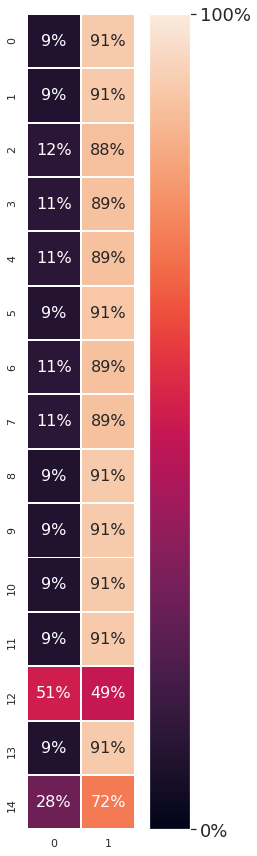

In [ ]:
import numpy as np;
import seaborn as sns; sns.set()
import matplotlib

plt.subplots(figsize=(5,15))

matplotlib.rc('xtick', labelsize=30)

matplotlib.rc('ytick', labelsize=18)

uniform_data = xgb_model_proba[0:15]
#uniform_data = my_ANN_proba
ax = sns.heatmap(uniform_data,annot=True, fmt='.0%', cbar=False, vmin=0, annot_kws={"size": 16}, vmax=1,square=1, linewidth=1.)
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([0, 1])
cbar.ax.set_yticklabels(['0%','100%'])

In [ ]:

from sklearn import metrics

fprn, tprn, thresholds = metrics.roc_curve(y, xgb_model_proba[:,1], pos_label=1)
XGBs = metrics.auc(fprn, tprn)

print(fprn)
print(tprn)

[0.         0.00565724 0.01297837 0.02579035 0.02712146 0.03427621
 0.03460899 0.03610649 0.03610649 0.03860233 0.04276206 0.04359401
 0.04425957 0.04475874 0.04559068 0.04559068 0.04592346 0.04625624
 0.04642263 0.04725458 0.04725458 0.04758735 0.04758735 0.04792013
 0.04808652 0.04825291 0.04858569 0.04875208 0.04925125 0.04958403
 0.04958403 0.05024958 0.05058236 0.05058236 0.05074875 0.05074875
 0.05124792 0.05124792 0.05124792 0.05124792 0.05141431 0.0515807
 0.0515807  0.0515807  0.05174709 0.05174709 0.05174709 0.05174709
 0.05174709 0.05174709 0.05174709 0.05174709 0.05191348 0.05191348
 0.05191348 0.05191348 0.05191348 0.05191348 0.05191348 0.05191348
 0.05191348 0.05191348 0.05191348 0.05191348 0.05207987 0.05207987
 0.05207987 0.05207987 0.05207987 0.05207987 0.05207987 0.05207987
 0.05207987 0.05207987 0.05207987 0.05207987 0.05207987 0.05207987
 0.05207987 0.05207987 0.05207987 0.05207987 0.05207987 0.05207987
 0.05207987 0.05257903 0.05257903 0.05257903 0.05257903 0.05257

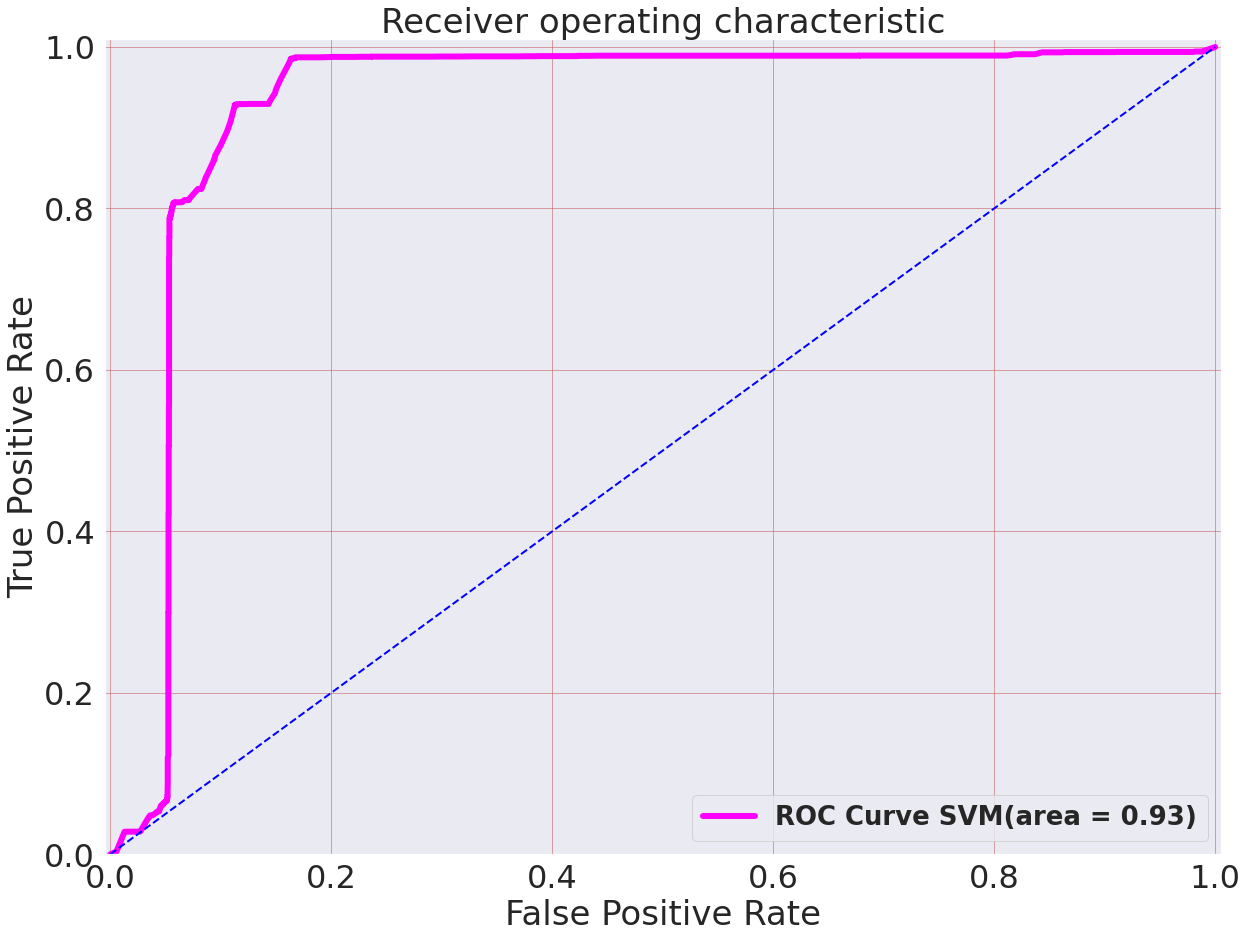

In [ ]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:

import matplotlib.pyplot as plt


rc={'axes.labelsize': 34, 'font.size': 34, 'legend.fontsize': 34.0, 'axes.titlesize': 34}
plt.rcParams.update(**rc)

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

fig, ax=plt.subplots(figsize=(20,15))

ax.tick_params(direction='out', length=6, width=2, labelsize=32,
               grid_color='r', grid_alpha=0.5)
# Roc Curve:
plt.plot(fprn, tprn, color='Magenta', lw=6, 
         label='ROC Curve SVM(area = %0.2f)' % XGBs)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right",prop={'size':20},fontsize=32,handlelength=12,handleheight=2)
plt.legend(loc=4, prop={'size': 26,'weight':'bold','style':'normal'})
plt.savefig("AUC Comparison v2",dpi=300)

plt.show()

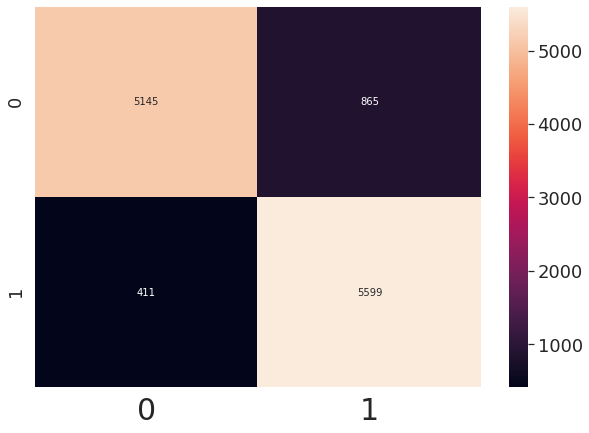

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#svm_predict = svclassifier.predict(X_test)
xgb=xgb_model_proba[:,1]>0.5
cm=metrics.confusion_matrix(y,xgb)

plt.figure(figsize = (10,7))
sn.heatmap(cm, fmt='', annot=True)


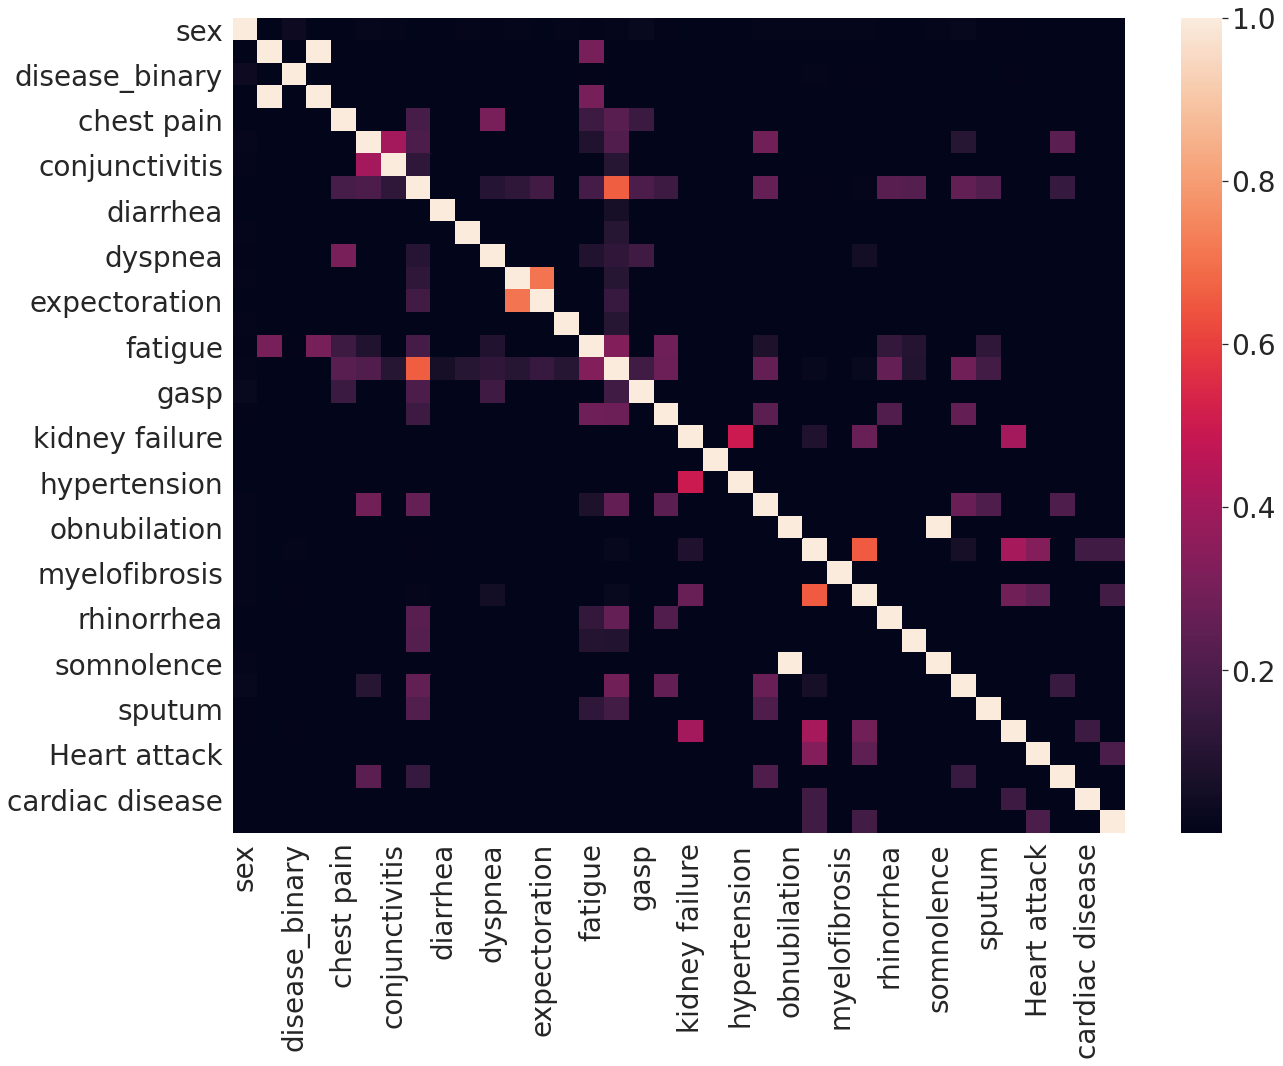

In [ ]:

matplotlib.rc('xtick', labelsize=28)

matplotlib.rc('ytick', labelsize=28)

plt.subplots(figsize=(20,15))


num_col=['sex', 'anorexia', 'chronic_disease_binary', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']

dfp = df[num_col]
dfp=dfp.rename(columns={'chronic_disease_binary':'disease_binary'})

corrMatrix = dfp.corr()
corrMatrix=abs(corrMatrix)
sn.heatmap(corrMatrix)
plt.savefig("Feature Correlation HeatMap feat1 v2",dpi=300)


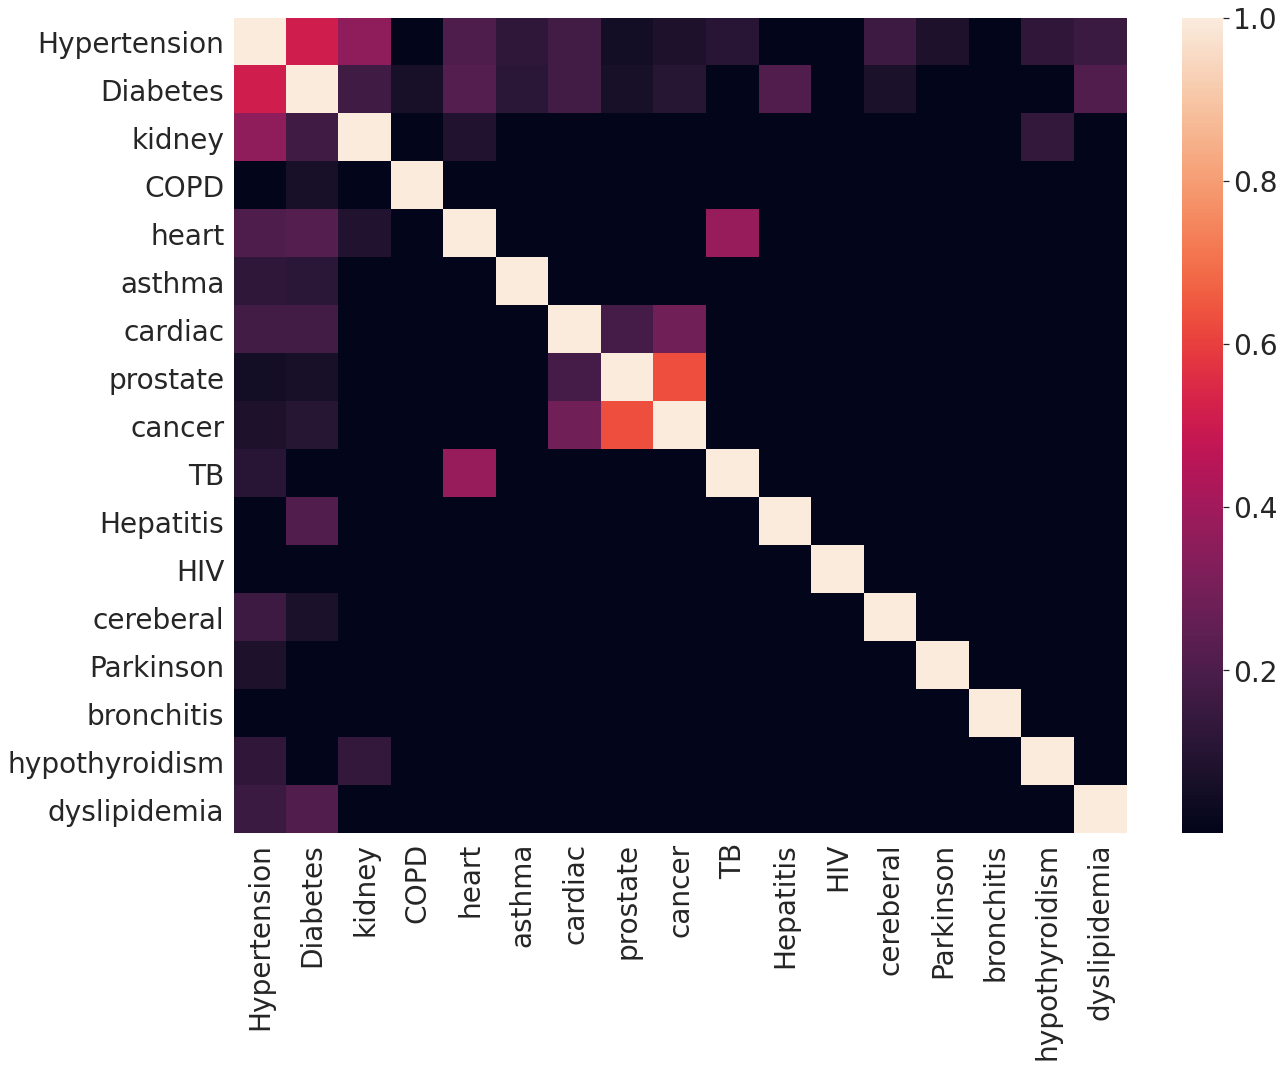

In [ ]:
matplotlib.rc('xtick', labelsize=28)

matplotlib.rc('ytick', labelsize=28)

plt.subplots(figsize=(20,15))

num_col=['chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia']

dfp = df[num_col]

dfp=dfp.rename(columns={
'chronic_disease_Hypertension' :'Hypertension',
'chronic_disease_Diabetes' :'Diabetes',
'chronic_disease_kidney' :'kidney',
'chronic_disease_COPD' :'COPD',
'chronic_disease_heart' :'heart',
'chronic_disease_asthma' :'asthma',
'chronic_disease_cardiac' :'cardiac',
'chronic_disease_prostate' :'prostate',
'chronic_disease_cancer' :'cancer',
'chronic_disease_TB' :'TB',
'chronic_disease_Hepatitis' :'Hepatitis',
'chronic_disease_HIV' :'HIV',
'chronic_disease_cereberal' :'cereberal',
'chronic_disease_Parkinson' :'Parkinson',
'chronic_disease_bronchitis' :'bronchitis',
'chronic_disease_hypothyroidism' :'hypothyroidism',
'chronic_disease_dyslipidemia' :'dyslipidemia'
})

corrMatrix = dfp.corr()
corrMatrix=abs(corrMatrix)
sn.heatmap(corrMatrix)
plt.savefig("Feature Correlation HeatMap Chronic disease v2",dpi=300)
